<a href="https://colab.research.google.com/github/EddyGiusepe/Time_Series_ONE/blob/main/Time_Series_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>Time Series com Python</h2> 


**Cientista de Dados Jr.:**  Dr.Eddy Giusepe Chirinos Isidro


Scrip baseado no seguinte vídeo:

* [Time Series Analysis in Python](https://www.youtube.com/watch?v=m2Oft2nllw4).

# Importando as nossas bibliotecas

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf
from math import sqrt


## <font color="orange">Autocorrelação</font>



In [2]:
msft = pd.read_csv("/content/drive/MyDrive/4_teoria_IA_ML_DL_Eddy/Time_Series_Analysis_in_Python/MSFT.csv",
                   index_col="Date", parse_dates=["Date"])

In [3]:
msft.sample(10)

,Adj Close
Date,
2014-04-15,36.502331
2017-01-03,61.848385
2016-05-20,49.384712
2017-01-20,62.006512
2015-01-21,43.000450
2016-10-10,56.976551
2012-12-24,23.939793
2015-08-24,39.824150
2015-11-25,51.645161


In [4]:
# converter os dados diários em dados semanais.

msft = msft.resample("W").last()

In [5]:
# Calculamos a variação percentual dos preços

msft_pct = msft.pct_change().dropna()

In [6]:
# Calculamos e imprimimos a autocorrelação de retornos

auto_msft = msft_pct["Adj Close"].autocorr()

In [7]:
print("Autocorrelação de retornos =", auto_msft.round(2))

Autocorrelação de retornos = -0.16


In [8]:
# Encontre o número de observações tomando o comprimento dos retornos DataFrame

nobs = len(msft)

In [11]:
nobs

261

In [10]:
# Calcular o intervalo de confiança aproximado

conf = 1.96/sqrt(nobs)

print("Intervalo de confiança aproximado = ", "{:.2f}".format(conf))

Intervalo de confiança aproximado =  0.12


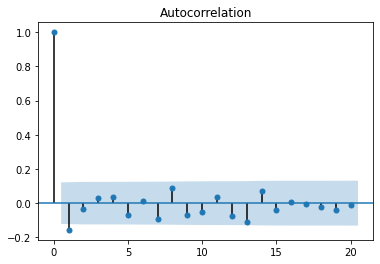

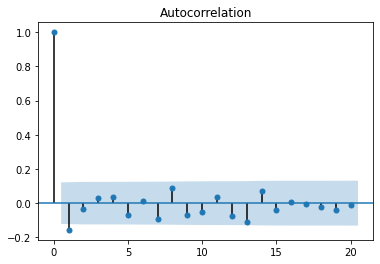

In [12]:
# Plot a função de autocorrelação com intervalos de confiança de 95% e 20 defasagens usando plot_acf

plot_acf(msft_pct, alpha=0.05, lags=20)

# Calcule a ACF

In [14]:
hrb = pd.read_csv("/content/drive/MyDrive/4_teoria_IA_ML_DL_Eddy/Time_Series_Analysis_in_Python/HRB.csv")

In [17]:
hrb.head(4)

# Quarter --> Trimestre, quarto
# Earnings --> ganhos, sálario 

,Quarter,Earnings
0,2007Q1,-0.36
1,2007Q2,-0.38
2,2007Q3,0.07
3,2007Q4,1.85


In [18]:
# Calcule a matriz acf de HRB

hrb_list = acf(hrb["Earnings"])
hrb_list

array([ 1.        , -0.22122696, -0.39856504, -0.26615093,  0.83479804,
       -0.1901038 , -0.3475634 , -0.23140368,  0.71995993, -0.15661007,
       -0.29766783, -0.22097189,  0.61656933, -0.15022869, -0.27922022,
       -0.22465946,  0.5725259 , -0.08758288, -0.24075584, -0.20363054,
        0.4797058 , -0.06091139, -0.20935484, -0.18303202,  0.42481275,
       -0.03352559, -0.17471087, -0.16384328,  0.34341079, -0.01734364,
       -0.13820811, -0.12232172,  0.28407164, -0.01927656, -0.11757974,
       -0.10386933,  0.20156485, -0.0120634 , -0.07509539, -0.0707104 ,
        0.10222029])

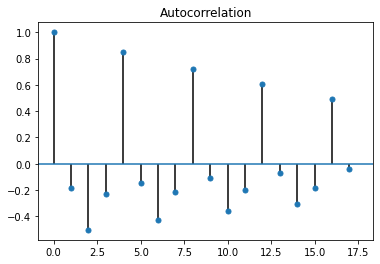

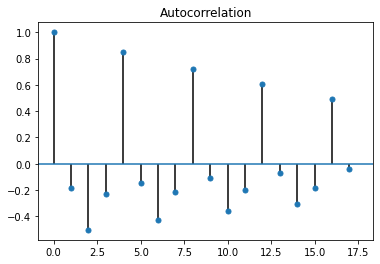

In [22]:
# Plot a função acf

plot_acf(hrb_list, alpha=1)

# Não é possível prever ruído branco (Can't Forecast White Noise)